# Project: Wrangling and Analyze Data

In [1]:
# Importing necessary librabries
import os
import requests as req
import pandas as pd
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

## Data Gathering
In the cell below, we will gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading csv file to Pandas DataFrame
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Let's see the first five rows.
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# save url content to file
with open ("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
    
# reading the tsv file into a DataFrame (separator is tab '\t')
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
# Let's see the first five rows.
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443:

Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718: 680191257256136705
Fail
1719: 680176173301628928
Fail
1720: 680161097740095489
Fail
1721: 680145970311643136
Fail
1722: 680130881361686529
Fail
1723: 680115823365742593
Fail
1724:

Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993: 672614745925664768
Fail
1994: 672609152938721280
Fail
1995: 672604026190569472
Fail
1996: 672594978741354496
Fail
1997: 672591762242805761
Fail
1998: 672591271085670400
Fail
1999: 672538107540070400
Fail
2000: 672523490734551040
Fail
2001: 672488522314567680
Fail
2002: 672482722825261057
Fail
2003: 672481316919734272
Fail
2004: 672475084225949696
Fail
2005: 672466075045466113
Fail
2006: 672272411274932228
Fail
2007: 672267570918129665
Fail
2008: 672264251789176834
Fail
2009: 672256522047614977
Fail
2010: 672254177670729728
Fail
2011: 672248013293752320
Fail
2012: 672245253877968896
Fail
2013: 672239279297454080
Fail
2014: 672231046314901505
Fail
2015: 672222792075620352
Fail
2016: 672205392827572224
Fail
2017:

Fail
2279: 667435689202614272
Fail
2280: 667405339315146752
Fail
2281: 667393430834667520
Fail
2282: 667369227918143488
Fail
2283: 667211855547486208
Fail
2284: 667200525029539841
Fail
2285: 667192066997374976
Fail
2286: 667188689915760640
Fail
2287: 667182792070062081
Fail
2288: 667177989038297088
Fail
2289: 667176164155375616
Fail
2290: 667174963120574464
Fail
2291: 667171260800061440
Fail
2292: 667165590075940865
Fail
2293: 667160273090932737
Fail
2294: 667152164079423490
Fail
2295: 667138269671505920
Fail
2296: 667119796878725120
Fail
2297: 667090893657276420
Fail
2298: 667073648344346624
Fail
2299: 667070482143944705
Fail
2300: 667065535570550784
Fail
2301: 667062181243039745
Fail
2302: 667044094246576128
Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307: 666835007768551424
Fail
2308: 666826780179869698
Fail
2309: 666817836334096384
Fail
2310: 666804364988780544
Fail
2311: 666786068205871104
Fail
2312:

In [7]:
# reading json file with json.loads
json_list = []

with open ('tweet_json.txt', mode = 'r') as r_file:
    for line in r_file.readlines():
        data = json.loads(line)
        json_list.append({'tweet_id': data['id'],
                       'retweet_count': data['retweet_count'],
                       'favorite_count': data['favorite_count'],
                       })


twitter_api_data = pd.DataFrame(json_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
twitter_api_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment and
programmatic assessement to assess the data.

### Visual assessment

In [8]:
# Let's check samples of 20 random rows for each dataset.
archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,None,None,None,None
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None


* The rating appear in two columns, therefore, rating_numerator needs to be divided by rating rating_denominator, to get rating as one single number for easy comparision
* The dog stages appear in four columns (doggo, floofer, pupper, puppo) but should be stored as one variable in one column
* 'NaN' values in the 'name' column is showing as 'None'
* The texts of tweet are not visible enough due to maximum column width exceeded.
* There are unnecessary columns expecially those relating to replies and retweets.

In [9]:
images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
650,681981167097122816,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,Labrador_retriever,0.452577,True,golden_retriever,0.403420,True,beagle,0.069486,True
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,West_Highland_white_terrier,0.586173,True,borzoi,0.206620,True,Great_Pyrenees,0.060653,True
562,677918531514703872,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg,1,Eskimo_dog,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True
187,669367896104181761,https://pbs.twimg.com/media/CUoSjTnWwAANNak.jpg,1,basset,0.749394,True,beagle,0.133579,True,Welsh_springer_spaniel,0.030198,True
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,0.008862,True
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False


* There are three different predictions of dog breeds for each image which is not really necessary. We should keep only one predicted value, either dog breed with highest prediction, or information that no dog was predicted by neural network
* first letter of dog breed is sometimes lowercase, sometimes uppercase

In [10]:
twitter_api_data.sample(20)

,tweet_id,retweet_count,favorite_count
1859,675483430902214656,1081,1985
882,760190180481531904,2079,6334
822,769940425801170949,11131,34948
1687,681340665377193984,313,1803
292,837820167694528512,8952,37277
1400,699423671849451520,383,1505
382,827199976799354881,2579,11659
349,831552930092285952,2632,9872
537,806620845233815552,6426,0
1877,675015141583413248,1335,2918


### Programatic Assessment

In [11]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* The datatype for the timestamp column should be datetime and not object.
* The datatype for the tweet_id column should be object.
* We only want original ratings (no retweets) that have images, but there are replies to tweets and retweets included.
* Some of the columns are not needed (e.g. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', etc.)

In [12]:
# Lets see the different dog names in the "name" column.
with pd.option_context('display.max_rows', 800):
    print (archive.name.value_counts())

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
               ... 
Ralphie           1
unacceptable      1
Leonidas          1
Brady             1
Fiji              1
Name: name, Length: 957, dtype: int64


* There are some values in the names column that are not names of dogs.

In [13]:
archive.duplicated().any()

False

In [14]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id should be object datatype (no mathematical operations will be done with tweet_id)

In [15]:
images.duplicated().any()

False

In [16]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
twitter_api_data.duplicated().any()

False

tweet_ids column should be renamed to tweet_id as the other tables for easy merging of all 3 tables

### Quality issues

1. **archive:** The datatype for the 'timestamp' column should be datetime and not object.

2. **archive:** There are some values in the 'name' column that are not names of dogs.

3. **archive:** Replies and retweets are included in the dataset (we want only original tweets).

4. **archive:** Unnecessary columns in the dataFrame.

5. **archive:** 'None' values in 'name' column instead of 'NaN'.

6. **archive:** Tweet texts in the 'text' column not visible enough due to maximum column width.

7. **images:** Inconsistency in the case of the first letter of dog breed in the 'p1', 'p2' and 'p3' columns.

8. **archive, twitter_api_data and images:** datatype of tweet_id should be object.

### Tidiness issues

1. **images:** Prediction of dog breeds with its confidence rate should occupy two columns alone and not nine columns.

2. **archive:** Rating should occupy one column alone and not two columns.

3. **archive:** The dog stage should occupy one column alone and not four columns ('doggo', 'floofer', 'pupper', 'puppo').

4. **archive, twitter_api_data and images:** The three dataFrames should be combined to form one DataFrame because our observational unit is 'Tweet' and that is what they are all talking about.

## Cleaning Data
In this section, we will clean **all** of the issues documented above. 

In [18]:
# firtsly, we need to create copies of original data
archive_new = archive.copy()
images_new = images.copy()
twitter_api_data_new = twitter_api_data.copy()

### Quality Issue #1: 
**archive:** The datatype for the 'timestamp' column should be datetime and not object

#### Define: 
Change the datatype for the 'timestamp' column in archive to datetime.

#### Code

In [19]:
archive_new['timestamp'] = pd.to_datetime(archive_new['timestamp'])

#### Test

In [20]:
archive_new['timestamp'].dtype

datetime64[ns, UTC]

### Quality Issue #2:
**archive:** There are some values in the 'name' column that are not names of dogs.

#### Define:
Change all strange dog names in the archive having a lowercase first letter to NaN

#### Code

In [21]:
# create list of faulty dog names
strange_names = archive_new[archive_new['name'].str[0].str.islower()]
strange_names_list = (strange_names.name.unique()).tolist()

In [22]:
# Replace faulty names as NaN
for name in archive_new.name:
    if name in strange_names_list:
        archive_new.name.replace(name, np.nan, inplace=True)

#### Test

In [23]:
# check if any name in strange_names_list still exist in archive_new.name. 
archive_new.name.isin(strange_names_list).any()

False

In [24]:
# Let's now see the remaining names
archive_new.name.value_counts()

None        745
Charlie      12
Oliver       11
Lucy         11
Cooper       11
           ... 
Ralphie       1
Leonidas      1
Brady         1
Snoopy        1
Fiji          1
Name: name, Length: 932, dtype: int64

### Quality Issue #3:
**archive:** Replies and retweets are included in the dataset (we want only original tweets).

#### Define:
Remove replies and retweets from the dataset.

#### Code

In [25]:
# select only rows where in_reply_to_status_id has a value of "NaN"
archive_new = archive_new[archive_new.in_reply_to_status_id.isna()]

In [26]:
# select only rows where retweeted_status_id has a value of "NaN"
archive_new = archive_new[archive_new.retweeted_status_id.isna()]

#### Test

In [27]:
# Let's now see the values in the 'in_reply_to_status_id' column.
archive_new.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [28]:
# Let's now see the values in the 'retweeted_status_id' column.
archive_new.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [29]:
# Check first five rows
archive_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality Issue #4:
**archive:** Unnecessary columns in the dataFrame.

#### Define:
Drop redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

#### Code

In [30]:
# Let's drop those columns we don't want.
archive_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [31]:
# Let's see the remaining columns
archive_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue #5:
**archive:** 'None' values in 'name' column instead of 'NaN'.

#### Define:
Replace all  'None' values in 'name' column with 'NaN'.

#### Code

In [32]:
archive_new.name = archive_new.name.replace("None", np.nan)

#### Test

In [33]:
#Let's see if there are still None values other than the NaN values which will be specified as None.
archive_new[archive_new['name']=="None"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #6:
**archive:** Tweet texts in the 'text' column not visible enough due to maximum column width.

#### Define:
Make the whole texts of the tweets visible.

#### Code

In [34]:
# Change maximum column width to 200
pd.options.display.max_colwidth = 200

#### Test

In [35]:
archive_new.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

### Quality Issue #7:
**images:** Inconsistency in the case of the first letter of dog breed in the 'p1', 'p2' and 'p3' columns.

#### Define:
Change the first letter of the breeds to upper case and replace underscores with a space.

#### Code

In [36]:
# Replace underscores with a space and make the first letter of the breeds to be in upper case.
images_new['p1'] = images_new['p1'].str.replace("_", " ").str.title()
images_new['p2'] = images_new['p2'].str.replace("_", " ").str.title()
images_new['p3'] = images_new['p3'].str.replace("_", " ").str.title()

#### Test

In [37]:
# Let's see the 'p1', 'p2' and 'p3' columns again.
images_new[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Quality Issue #8:
**archive, twitter_api_data and images:** datatype of tweet_id should be object.

#### Define:
Change the tweet_id datatype to object in the three DataFrames since we do not need to do any mathematical calculations with it.

#### Code

In [38]:
archive_new.tweet_id = archive_new.tweet_id.astype(str)
twitter_api_data_new.tweet_id = twitter_api_data_new.tweet_id.astype(str)
images_new.tweet_id = images_new.tweet_id.astype(str)

#### Test

In [39]:
# check the new datatypes
archive_new.tweet_id.dtype, twitter_api_data_new.tweet_id.dtype, images_new.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

### Tidiness Issue #1:
**images:** Prediction of dog breeds with its confidence rate should occupy two columns alone and not nine columns.

#### Define:
Pick the first prediction with a value of 'True' in the p1_dog, p2_dog or p3_dog column.
Also pick the confidence associated with the prediction above.

#### Code

In [40]:
# Let's define a function that will append only the first prediction with a value of 'True' in the columns p1_dog, p2_dog and p3_dog. 
breed_prediction = []
confidence = []

def first_true_prediction(images_new):
    if images_new.p1_dog == True:
        breed_prediction.append(images_new.p1)
        confidence.append(images_new.p1_conf)
    elif images_new.p2_dog == True:
        breed_prediction.append(images_new.p2)
        confidence.append(images_new.p2_conf)
    elif images_new.p3_dog == True:
        breed_prediction.append(images_new.p3)
        confidence.append(images_new.p3_conf)
    else:
        # set value as NaN if no prediction is true
        breed_prediction.append(np.nan)
        confidence.append(np.nan)
        
# apply the function to the full DataFrame       
images_new.apply(first_true_prediction, axis=1)
        
# Create two new columns to display breed_prediction and the confidence.
images_new['breed_prediction'] = breed_prediction
images_new['confidence'] = confidence

In [41]:
# Let's see the result.
images_new.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


In [42]:
# we have to drop the redundant p1, p2 and p3 related columns.
images_new.drop(['p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [43]:
# Let's see the result again.
images_new.head()

,tweet_id,jpg_url,img_num,breed_prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


### Tidiness Issue #2:
**archive:** Rating should occupy one column alone and not two columns.

#### Define:
Create a single variable for rating that will be the quotient of rating_numerator and rating_denominator.

#### Code

In [44]:
# Add a column "rating" that is the quotient of rating_numerator and rating_denominator
archive_new['rating'] = archive_new['rating_numerator']/archive_new['rating_denominator']
# Round the ratings to only one decimal place
archive_new.rating.round(1)

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2097, dtype: float64

In [45]:
# Reassign the rating column to effect the change.
archive_new['rating'] = archive_new.rating.round(1)

In [46]:
# we have to drop the redundant 'rating_numerator' and 'rating_denominator' columns.
archive_new.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

#### Test

In [47]:
# Let's see the result.
archive_new.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


In [48]:
# Let's see more samples.
archive_new.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
151,862831371563274240,2017-05-12 00:46:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Zooey. She's the world's biggest fan of illiterate delivery people. 13/10 not your fault they don't listen, Zooey https://t.co/ixOFQ1tfqE","https://twitter.com/dog_rates/status/862831371563274240/photo/1,https://twitter.com/dog_rates/status/862831371563274240/photo/1",Zooey,None,None,None,None,1.3
1053,742465774154047488,2016-06-13 21:16:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Was just informed about this hero pupper and others like her. Another 14/10, would be an absolute honor to pet https://t.co/hBTzPmj36Z","https://twitter.com/dog_rates/status/742465774154047488/photo/1,https://twitter.com/dog_rates/status/742465774154047488/photo/1",NaN,None,None,pupper,None,1.4
154,862096992088072192,2017-05-10 00:08:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,"https://twitter.com/dog_rates/status/862096992088072192/photo/1,https://twitter.com/dog_rates/status/862096992088072192/photo/1",NaN,None,None,None,None,1.3
2158,669573570759163904,2015-11-25 17:49:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Linda. She just looked up and saw you glancing at your neighboring classmate's test. 10/10 https://t.co/UpFFYhA1Id,https://twitter.com/dog_rates/status/669573570759163904/photo/1,Linda,None,None,None,None,1.0
1993,672609152938721280,2015-12-04 02:51:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Caryl. Likes to get in the microwave. 9/10 damn it Caryl https://t.co/YAVwvNaois,https://twitter.com/dog_rates/status/672609152938721280/photo/1,Caryl,None,None,None,None,0.9
1736,679722016581222400,2015-12-23 17:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,https://twitter.com/dog_rates/status/679722016581222400/photo/1,Mike,None,None,None,None,0.8
667,790337589677002753,2016-10-23 23:42:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She can hear your cells divide. 12/10 can also probably fly https://t.co/ovE2hqXryV,https://twitter.com/dog_rates/status/790337589677002753/photo/1,Maggie,None,None,None,None,1.2
283,838952994649550848,2017-03-07 03:22:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN https://t.co/ngAxYLVYHP,https://twitter.com/ktla/status/838948714227998720,NaN,None,None,None,None,1.3
2223,668297328638447616,2015-11-22 05:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2 rare dogs. They waddle (v inefficient). Sometimes slide on bellies. Right one wants to be aircraft Marshall. 9/10s https://t.co/P8bivfp5sU,https://twitter.com/dog_rates/status/668297328638447616/photo/1,NaN,None,None,None,None,0.9
1732,679828447187857408,2015-12-24 00:58:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody look at this beautiful pupper 13/10 https://t.co/hyAC5Hq9GC,"https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1,https://twitter.com/dog_rates/status/679828447187857408/photo/1",NaN,None,None,pupper,None,1.3


### Tidiness Issue #3:
**archive:** The dog stage should occupy one column alone and not four columns ('doggo', 'floofer', 'pupper', 'puppo').

#### Define:
Create a single variable for the dog stage that will be the concatenation of the 'doggo', 'floofer', 'pupper' and 'puppo' columns.

#### Code

In [49]:
# There are None values in the dog stage columns, let's replace them with nothing before the concatenation.
archive_new.doggo = archive_new.doggo.replace("None", "")
archive_new.floofer = archive_new.floofer.replace("None", "")
archive_new.pupper = archive_new.pupper.replace("None", "")
archive_new.puppo = archive_new.puppo.replace("None", "")

In [50]:
# add a new column "dog_stage" and concatenate the other dog stage columns into it.
archive_new['dog_stage'] = archive_new['doggo'] + archive_new['floofer'] + archive_new['pupper'] + archive_new['puppo']
# Let's see what we have in the dog_stage column.
archive_new.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [51]:
# some of the values are a combination of two dog stages because the different stages had values in the specific row.
# Let's separate them with a comma and a space in the dog_stage 
archive_new.loc[archive_new.dog_stage=='doggopupper', 'dog_stage']="doggo, pupper"
archive_new.loc[archive_new.dog_stage=='doggopuppo', 'dog_stage']="doggo, puppo"
archive_new.loc[archive_new.dog_stage=='doggofloofer', 'dog_stage']="doggo, floofer"
# Replacing the empty spaces with 'NaN'
archive_new.dog_stage = archive_new.dog_stage.replace("", np.nan)
# droping the redundant columns
archive_new.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace=True)

#### Test

In [52]:
archive_new.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [53]:
archive_new.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
1332,705475953783398401,2016-03-03 19:32:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n,"https://twitter.com/dog_rates/status/705475953783398401/photo/1,https://twitter.com/dog_rates/status/705475953783398401/photo/1",Zara,1.2,NaN
1243,711968124745228288,2016-03-21 17:30:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's trapped in a cup of coffee. Poor pupper. 10/10 someone free him https://t.co/2e6cUtKUuc,https://twitter.com/dog_rates/status/711968124745228288/photo/1,Winston,1.0,pupper
1584,687096057537363968,2016-01-13 02:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper's New Year's resolution was to become a Hershey's kiss. 11/10 she's super pumped about it https://t.co/D7jYj6vdwC,https://twitter.com/dog_rates/status/687096057537363968/photo/1,NaN,1.1,pupper
724,782747134529531904,2016-10-03 01:00:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Deacon. He's the happiest almost dry doggo I've ever seen. 11/10 would smile back https://t.co/C6fUMnHt1H,https://twitter.com/dog_rates/status/782747134529531904/photo/1,Deacon,1.1,doggo
1346,704480331685040129,2016-03-01 01:36:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe,https://twitter.com/dog_rates/status/704480331685040129/photo/1,Lucia,1.1,NaN
1317,706593038911545345,2016-03-06 21:31:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a sneak peek of me on spring break. 10/10 so many tired pups these days https://t.co/6aJrjKfNqX,https://twitter.com/dog_rates/status/706593038911545345/photo/1,NaN,1.0,NaN
991,748699167502000129,2016-07-01 02:06:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,"https://twitter.com/dog_rates/status/748699167502000129/photo/1,https://twitter.com/dog_rates/status/748699167502000129/photo/1",Tripp,1.1,NaN
437,820078625395449857,2017-01-14 01:22:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've never wanted to go to a camp more in my entire life. 12/10 for all on board https://t.co/wJZlpGFEbD,"https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1,https://twitter.com/dog_rates/status/820078625395449857/photo/1",NaN,1.2,NaN
828,768970937022709760,2016-08-26 00:38:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Kirby. His bowl weighs more than him. 12/10 would assist https://t.co/UlB2mzw3Xs,https://twitter.com/dog_rates/status/768970937022709760/video/1,Kirby,1.2,NaN
1691,681320187870711809,2015-12-28 03:46:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Glacier. He's a very happy pup. Loves to sing in the sunlight. 11/10 https://t.co/jTBPqKgkz7,https://twitter.com/dog_rates/status/681320187870711809/photo/1,Glacier,1.1,NaN


### Tidiness Issue #4:
**archive, twitter_api_data and images:** The three dataFrames should be combined to form one DataFrame because our observational unit is 'Tweet' and that is what they are all talking about.

#### Define:
Merge all three DataFrames together because they are all talking about tweet.

#### Code

In [54]:
# Check for columns with same names apart from 'tweet_id' column
archive_new.columns, twitter_api_data_new.columns, images_new.columns

(Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
        'rating', 'dog_stage'],
       dtype='object'),
 Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object'),
 Index(['tweet_id', 'jpg_url', 'img_num', 'breed_prediction', 'confidence'], dtype='object'))

In [55]:
# merging all tables on the 'tweet_id' column
twitter_archive_master = pd.merge(pd.merge(archive_new, images_new, on='tweet_id'), twitter_api_data_new, on='tweet_id')

#### Test

In [56]:
# Let's see the new DataFrame
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,breed_prediction,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,0.5,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,41,111
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,0.6,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,147,311
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,0.9,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,47,128
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,ht

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# Storing master file to new csv file (twitter_archive_master) in my local workspace
twitter_archive_master.to_csv(r'C:\Users\Egbua Golden\Desktop\ALX_T_Data_Analyst\Project_2\twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize our wrangled data, producing at least **three (3) insights and one (1) visualization.**

### Insights:
1. What are most dogs called in the WeRateDogs archive?

2. What are the most popular dog breeds in the WeRateDogs archive?

3. Do the the most popular dog breeds have the highest ratings in the WeRateDogs archive?

4. Which dog breeds have the most likes and what are their retweet_counts on average?

In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1971 non-null   object             
 1   timestamp         1971 non-null   datetime64[ns, UTC]
 2   source            1971 non-null   object             
 3   text              1971 non-null   object             
 4   expanded_urls     1971 non-null   object             
 5   name              1349 non-null   object             
 6   rating            1971 non-null   float64            
 7   dog_stage         303 non-null    object             
 8   jpg_url           1971 non-null   object             
 9   img_num           1971 non-null   int64              
 10  breed_prediction  1666 non-null   object             
 11  confidence        1666 non-null   float64            
 12  retweet_count     1971 non-null   int64              
 13  fav

#### Insight 1:
The most popular dog names

In [59]:
# Let's see the 20 most popular dog names in our DataFrame
twitter_archive_master.name.value_counts().head(20)

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Toby        7
Daisy       7
Lola        7
Koda        6
Jax         6
Stanley     6
Bella       6
Bo          6
Oscar       5
Bailey      5
Scout       5
Rusty       5
Name: name, dtype: int64

#### Insight 2:
The most popular dog breeds

In [60]:
# Let's see the 20 most popular dog breeds in our DataFrame
twitter_archive_master.breed_prediction.value_counts().head(20)

Golden Retriever             156
Labrador Retriever           106
Pembroke                      94
Chihuahua                     90
Pug                           62
Toy Poodle                    50
Chow                          48
Samoyed                       42
Pomeranian                    41
Malamute                      33
French Bulldog                31
Chesapeake Bay Retriever      31
Cocker Spaniel                30
Miniature Pinscher            24
Eskimo Dog                    22
German Shepherd               21
Cardigan                      21
Siberian Husky                20
Beagle                        20
Staffordshire Bullterrier     20
Name: breed_prediction, dtype: int64

#### Insight 3:
Do the most popular dog breeds have the highest ratings in the WeRateDogs archive?

In [62]:
# Let's group the count of breed_prediction and mean rating by the breed_prediction column.
I3 = twitter_archive_master.groupby('breed_prediction').agg({'breed_prediction': 'count', 'rating': 'mean'})
I3

,breed_prediction,rating
breed_prediction,,
Afghan Hound,3,0.966667
Airedale,12,0.983333
American Staffordshire Terrier,16,1.031250
Appenzeller,2,1.100000
Australian Terrier,2,1.150000
...,...,...
Welsh Springer Spaniel,4,0.950000
West Highland White Terrier,16,1.018750
Whippet,11,1.018182


In [63]:
# rename columns
I3.columns = ['breed_counts', 'mean_ratings']
# reset index to get grouped columns back
I3 = I3.reset_index()
# firstly, let's sort by breed_counts in descending order
I3_a = I3.sort_values(by='breed_counts', ascending=False)
# Let's see the top 20 breeds based on breed popularity
I3_a.head(20)

,breed_prediction,breed_counts,mean_ratings
45,Golden Retriever,156,1.167308
62,Labrador Retriever,106,1.119811
80,Pembroke,94,1.142553
27,Chihuahua,90,1.048889
82,Pug,62,1.024194
103,Toy Poodle,50,1.100000
28,Chow,48,1.141667
88,Samoyed,42,1.169048
81,Pomeranian,41,1.253659
66,Malamute,33,1.087879


In [64]:
# let's now sort by mean_ratings in descending order
I3_b = I3.sort_values(by='mean_ratings', ascending=False)
# Let's see the top 20 breeds based on breed rating
I3_b.head(20)

,breed_prediction,breed_counts,mean_ratings
29,Clumber,1,2.700000
18,Bouvier Des Flandres,1,1.300000
81,Pomeranian,41,1.253659
87,Saluki,4,1.250000
21,Briard,3,1.233333
101,Tibetan Mastiff,4,1.225000
15,Border Terrier,7,1.214286
95,Silky Terrier,1,1.200000
99,Standard Schnauzer,1,1.200000
46,Gordon Setter,4,1.175000


#### Insight 4:
Which dog breeds have the most likes and what are their retweet_counts on average?

In [65]:
# Let's group the sum of favorite_count and the sum of retweet_count by the breed_prediction column.
I4 = twitter_archive_master.groupby('breed_prediction').agg({'favorite_count': 'sum', 'retweet_count': 'sum'})
# rename columns
I4.columns = ['likes', 'retweet_counts']
# reset index to get grouped columns back
I4 = I4.reset_index()
# let's sort by likes in descending order
I4 = I4.sort_values(by='likes', ascending=False)
# Let's see the top 20 breeds based on likes
I4.head(20)

,breed_prediction,likes,retweet_counts
45,Golden Retriever,1943782,586657
62,Labrador Retriever,1265355,405404
80,Pembroke,1038797,291771
27,Chihuahua,743689,250722
88,Samoyed,583906,203446
41,French Bulldog,570921,156230
28,Chow,446933,131025
30,Cocker Spaniel,407412,145743
82,Pug,383817,118682
103,Toy Poodle,337270,115330


### Visualization

<AxesSubplot:title={'center':'Breed Likes and retweet Counts'}, xlabel='breed_prediction'>

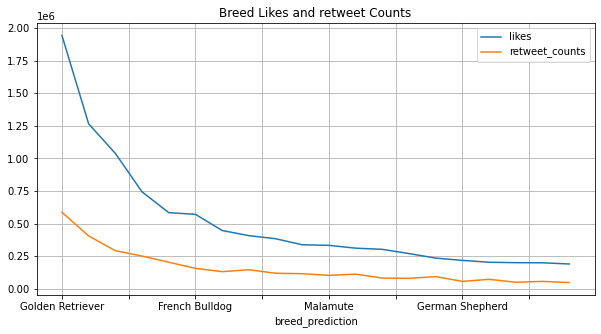

In [68]:
# Let's plot the top 20 breeds based on likes (using the insight 4 data), to see the relationship between the likes and retweet_counts.
I4[:20].plot(x='breed_prediction', y=['likes', 'retweet_counts'],title='Breed Likes and retweet Counts', figsize=(10,5), grid=True)

<AxesSubplot:title={'center':'Breed Likes and retweet Counts'}, xlabel='breed_prediction'>

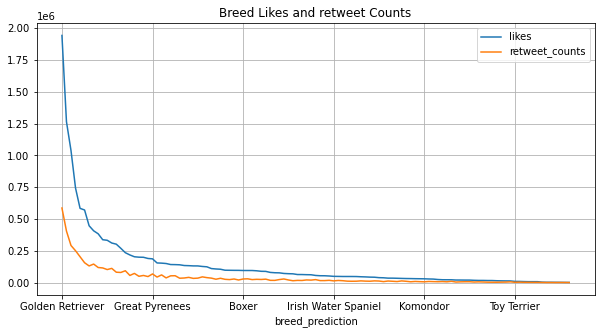

In [69]:
# Let's plot the whole insight 4 data (I4), to be sure tha the relationship between the likes and retweet_counts is not perculiar to the top 20 rows alone.
I4.plot(x='breed_prediction', y=['likes', 'retweet_counts'],title='Breed Likes and retweet Counts', figsize=(10,5), grid=True)

In [71]:
# Let's see what the most popular dog looks like
# First, we need the image url
twitter_archive_master.loc[twitter_archive_master['breed_prediction'] == 'Golden Retriever', 'jpg_url']

14      https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
16      https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17      https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
39      https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
41      https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg
                             ...                       
1908    https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg
1916    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg
1947    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
1960    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
1962    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
Name: jpg_url, Length: 156, dtype: object

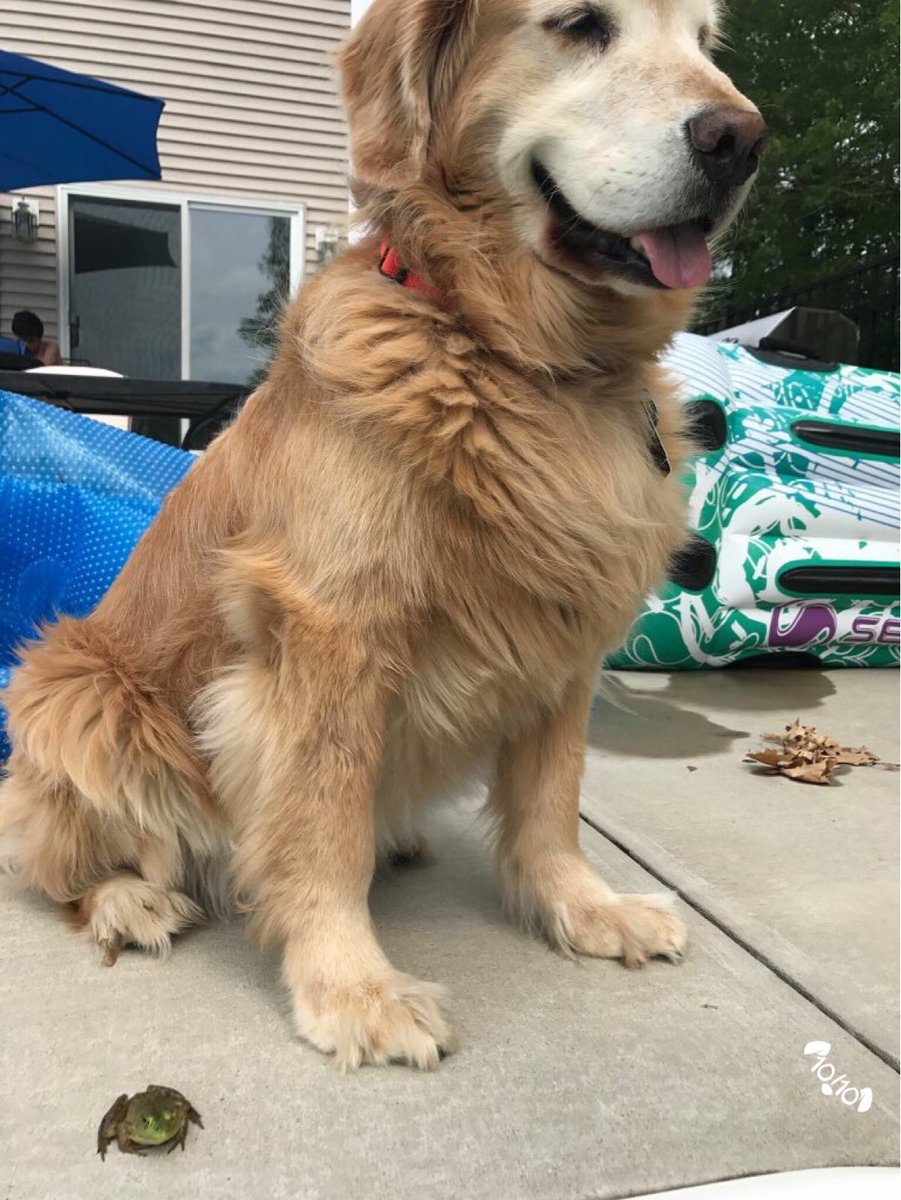

In [72]:
# To display the image, we need to import IPython.display
# Reference: https://stackoverflow.com/questions/40645782/display-an-image-from-web-using-ipython-display-image-sometimes-work-sometimes
import IPython.display as Disp
Golden_Retriever = 'https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg'
Disp.Image(req.get(Golden_Retriever).content)